In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import sys 
import os 

pth = os.path.join(os.getcwd(), os.path.join('..','..'), 'pincam')
if pth not in sys.path: sys.path.insert(0, pth)

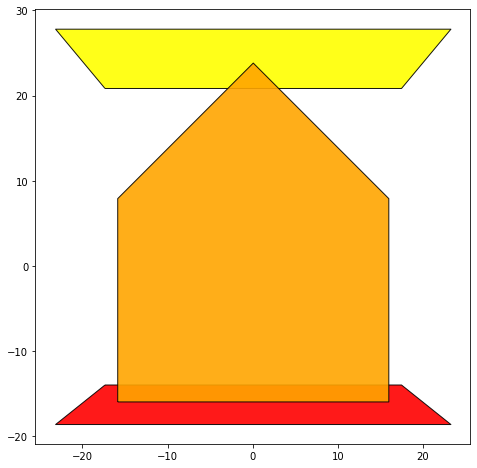

In [24]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from pincam import Pincam, shapely_from_srf3d

# Define surfaces
bot_srf = np.array([[-5, -5, 0], [5, -5, 0], [5, 5, 0], [-5, 5, 0]])
top_srf = np.array([[-5, -5, 10], [5, -5, 10], [5, 5, 10], [-5, 5, 10]])
vrt_srf = np.array([[-4, 0, 0], [4, 0, 0], [4, 0, 6], [0, 0, 10], [-4, 0, 6]])
ptmtx = [bot_srf, top_srf, vrt_srf]
colarr = ['red', 'yellow', 'orange']

# Define camera properteis
deg2rad = lambda d: d / 180. * np.pi
focal_length = 25
heading = deg2rad(180)
pitch = deg2rad(0)
cam_posn = np.array([0, -35, 4])

# Initialize camera with properties
cam = Pincam(cam_posn, heading, pitch, focal_length)

# Apply camera projection matrix to surfaces
xformed_ptmtx, _depths = cam.project(cam.P, ptmtx, ortho=False)

# Use simple raycasting to sample depths and resolve order of plotting
depths, db = cam.depth_buffer(ptmtx, _depths, res=25) 
xformed_ptmtx = [xformed_ptmtx[d] for d in depths]
colarr = [colarr[d] for d in depths]

# Insert into geopanda DataFrame for easy plotting
shapelys = [shapely_from_srf3d(np.array(srf)) for srf in xformed_ptmtx]
df = gpd.GeoDataFrame({'geometry': shapelys})

# inefficient
f, a = plt.subplots(figsize=(8, 8))
for i in range(len(colarr)):
    a = df.iloc[[i]].plot(edgecolor='black', facecolor=colarr[i], alpha=0.9, ax=a)
    

    
#_, _ = a.grid(False), a.axis(False)